In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.preprocessing import MinMaxScaler
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.feature_selection import RFE

In [ ]:
# from google.colab import drive
# drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
bike_data = pd.read_csv(r'/mnt/c/Users/Ashwin/Documents/Ash/Projects/ML/Data/Bike_Sharing_Dataset_Day.csv')
bike_data.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [ ]:
bike_data.shape

(730, 16)

In [ ]:
bike_data.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [ ]:
bike_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [ ]:
bike_data.dtypes

instant         int64
dteday         object
season          int64
yr              int64
mnth            int64
holiday         int64
weekday         int64
workingday      int64
weathersit      int64
temp          float64
atemp         float64
hum           float64
windspeed     float64
casual          int64
registered      int64
cnt             int64
dtype: object

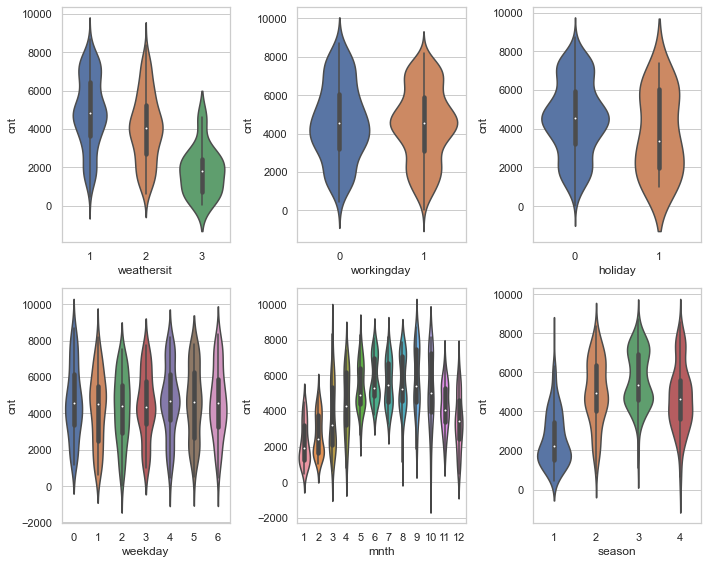

In [ ]:
sns.set(style="whitegrid", color_codes=True)

plt.figure(figsize=(10,8))
plt.subplot(2,3,1)
sns.violinplot(x='weathersit', y='cnt',data=bike_data)
plt.subplot(2,3,2)
sns.violinplot(x='workingday', y='cnt',data=bike_data)
plt.subplot(2,3,3)
sns.violinplot(x='holiday',y='cnt',data=bike_data)
plt.subplot(2,3,4)
sns.violinplot(x='weekday',y='cnt',data=bike_data)
plt.subplot(2,3,5)
sns.violinplot(x='mnth',y='cnt',data=bike_data)
plt.subplot(2,3,6)
sns.violinplot(x='season', y='cnt',data=bike_data)

plt.tight_layout()


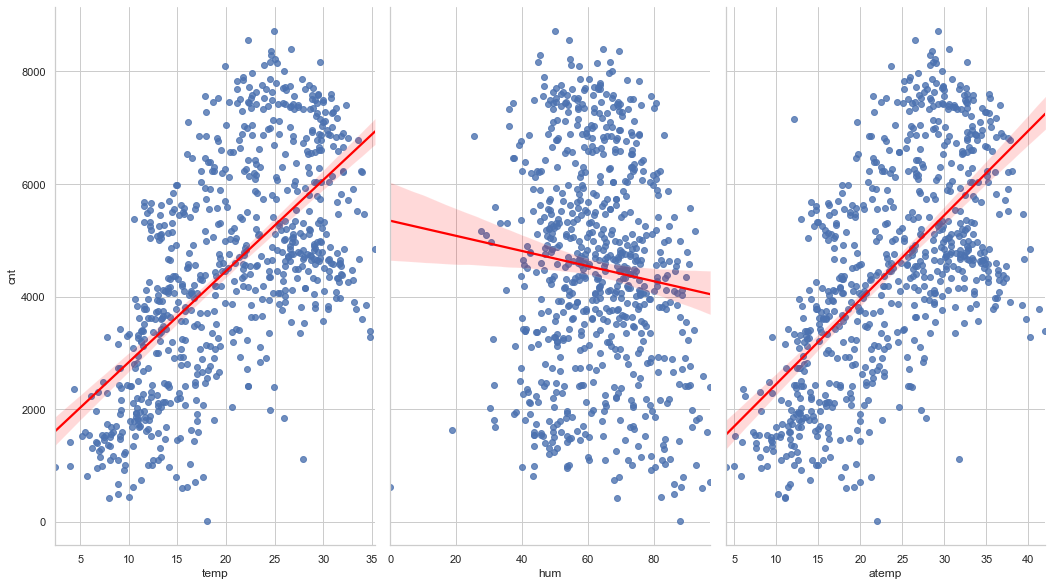

In [ ]:
sns.set(style="whitegrid", color_codes=True)
sns.pairplot(data=bike_data, x_vars=['temp','hum','atemp'], y_vars=['cnt'],kind='reg',height=8, aspect=0.6,plot_kws={'line_kws':{'color':'red'}})

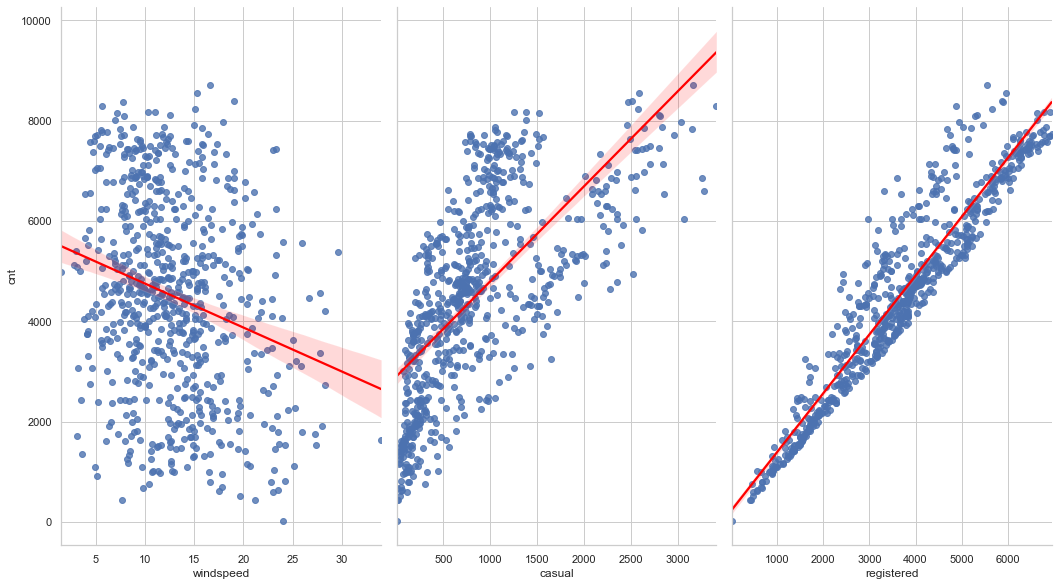

In [ ]:
sns.pairplot(data=bike_data, x_vars=['windspeed','casual','registered'], y_vars=['cnt'],kind='reg',height=8, aspect=0.6,plot_kws={'line_kws':{'color':'red'}})

In [ ]:
###Replacing Values in Season
bike_data["season"].replace({ 1: "spring", 2: "summer", 3:"fall", 4:"winter"}, inplace=True)
bike_data["season"].value_counts()

fall      188
summer    184
spring    180
winter    178
Name: season, dtype: int64

In [ ]:
###Replacing Values in Weathersit
bike_data["weathersit"].replace({ 1: "Clear", 2: "Mist", 3:"Light Rain", 4:"Heavy Rain"},inplace=True)
bike_data["weathersit"].value_counts()

Clear         463
Mist          246
Light Rain     21
Name: weathersit, dtype: int64

In [ ]:
###Replacing Values in Weekday
bike_data['weekday'] = bike_data.weekday.replace({0: 'sunday', 1: 'monday', 2: 'tuesday', 3: 'wednesday', 4: 'thursday', 5: 'friday', 6: 'saturday'})
bike_data["weekday"].value_counts()

monday       105
tuesday      105
sunday       104
thursday     104
wednesday    104
saturday     104
friday       104
Name: weekday, dtype: int64

In [ ]:
###Replacing Values for month
bike_data['mnth'] = bike_data['mnth'].replace({1: 'Jan', 2: 'Feb', 3: 'March', 4: 'April', 5: 'May', 6: 'Jun', 7: 'Jul',8:'Aug',9:'Sept',10:'Oct',11:'Nov',12:'Dec'})

In [ ]:
bike_data.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,spring,0,Jan,0,monday,1,Mist,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,spring,0,Jan,0,tuesday,1,Mist,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,spring,0,Jan,0,wednesday,1,Clear,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,spring,0,Jan,0,thursday,1,Clear,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,spring,0,Jan,0,friday,1,Clear,9.305237,11.46350,43.6957,12.522300,82,1518,1600


Now we are Dropping the Instant Variable as it is not really a variable but the index.


-'Casual' & 'Registered' are getting dropped to because they are summed up in the target variable 'CNT'

- Dropping 'dteday' , the reason for dropping this is firstly its obj type, the second reason we already have variables such as 'month', 'year', 'weekday' etc.

In [ ]:
bike_data = bike_data.drop(columns=['casual', 'registered','instant','dteday'])

In [ ]:
bike_data.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,spring,0,Jan,0,monday,1,Mist,14.110847,18.18125,80.5833,10.749882,985
1,spring,0,Jan,0,tuesday,1,Mist,14.902598,17.68695,69.6087,16.652113,801
2,spring,0,Jan,0,wednesday,1,Clear,8.050924,9.47025,43.7273,16.636703,1349
3,spring,0,Jan,0,thursday,1,Clear,8.200000,10.60610,59.0435,10.739832,1562
4,spring,0,Jan,0,friday,1,Clear,9.305237,11.46350,43.6957,12.522300,1600


In [ ]:
bike_data.shape

(730, 12)

-now we create Dummy variables columns 'Seasons', 'Weathersit , 'mnth' .


- after creating dummy values for thesee columns we cand drop these colums.


- Now importantly if we notice the graphs abve we can see that the trend in the increase of bike popularity is well defined by variables such as 'Season' , 'Year , 'Weathersituation' & 'Month'


- The other variable such as holiday and weekday and working day do not explain the increase as much or explain it to a very miniscule scale , hence we can drop these variables.


In [ ]:
bike_data = pd.get_dummies(bike_data, columns=['season','weathersit','mnth'],drop_first = True)
bike_data.head()

,yr,holiday,weekday,workingday,temp,atemp,hum,windspeed,cnt,season_spring,...,mnth_Dec,mnth_Feb,mnth_Jan,mnth_Jul,mnth_Jun,mnth_March,mnth_May,mnth_Nov,mnth_Oct,mnth_Sept
0,0,0,monday,1,14.110847,18.18125,80.5833,10.749882,985,1,...,0,0,1,0,0,0,0,0,0,0
1,0,0,tuesday,1,14.902598,17.68695,69.6087,16.652113,801,1,...,0,0,1,0,0,0,0,0,0,0
2,0,0,wednesday,1,8.050924,9.47025,43.7273,16.636703,1349,1,...,0,0,1,0,0,0,0,0,0,0
3,0,0,thursday,1,8.200000,10.60610,59.0435,10.739832,1562,1,...,0,0,1,0,0,0,0,0,0,0
4,0,0,friday,1,9.305237,11.46350,43.6957,12.522300,1600,1,...,0,0,1,0,0,0,0,0,0,0


In [ ]:
bike_data.columns

Index(['yr', 'holiday', 'weekday', 'workingday', 'temp', 'atemp', 'hum',
       'windspeed', 'cnt', 'season_spring', 'season_summer', 'season_winter',
       'weathersit_Light Rain', 'weathersit_Mist', 'mnth_Aug', 'mnth_Dec',
       'mnth_Feb', 'mnth_Jan', 'mnth_Jul', 'mnth_Jun', 'mnth_March',
       'mnth_May', 'mnth_Nov', 'mnth_Oct', 'mnth_Sept'],
      dtype='object')

In [ ]:
bike_data = bike_data.drop(columns=['weekday', 'holiday','workingday'])
bike_data.columns

Index(['yr', 'temp', 'atemp', 'hum', 'windspeed', 'cnt', 'season_spring',
       'season_summer', 'season_winter', 'weathersit_Light Rain',
       'weathersit_Mist', 'mnth_Aug', 'mnth_Dec', 'mnth_Feb', 'mnth_Jan',
       'mnth_Jul', 'mnth_Jun', 'mnth_March', 'mnth_May', 'mnth_Nov',
       'mnth_Oct', 'mnth_Sept'],
      dtype='object')

In [ ]:
bike_data.shape

(730, 22)

Spliting into train set and test set.


In [ ]:
bike_train, bike_test = train_test_split(bike_data,train_size=0.7,random_state=100)
print(bike_train.shape)
print(bike_test.shape)

(510, 22)
(220, 22)


scaling the numricals , using MinMax scaler

In [ ]:
scaler = MinMaxScaler()
variable = ['temp','atemp','hum','windspeed','cnt']
bike_train[variable] = scaler.fit_transform(bike_train[variable])

bike_train.head()

<ipython-input-210-8192721afdfc>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bike_train[variable] = scaler.fit_transform(bike_train[variable])
C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\indexing.py:966: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


,yr,temp,atemp,hum,windspeed,cnt,season_spring,season_summer,season_winter,weathersit_Light Rain,...,mnth_Dec,mnth_Feb,mnth_Jan,mnth_Jul,mnth_Jun,mnth_March,mnth_May,mnth_Nov,mnth_Oct,mnth_Sept
576,1,0.815169,0.766351,0.725633,0.264686,0.827658,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
426,1,0.442393,0.438975,0.640189,0.255342,0.465255,1,0,0,0,...,0,0,0,0,0,1,0,0,0,0
728,1,0.245101,0.200348,0.498067,0.663106,0.204096,1,0,0,0,...,1,0,0,0,0,0,0,0,0,0
482,1,0.395666,0.391735,0.504508,0.188475,0.482973,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
111,0,0.345824,0.318819,0.751824,0.380981,0.191095,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0


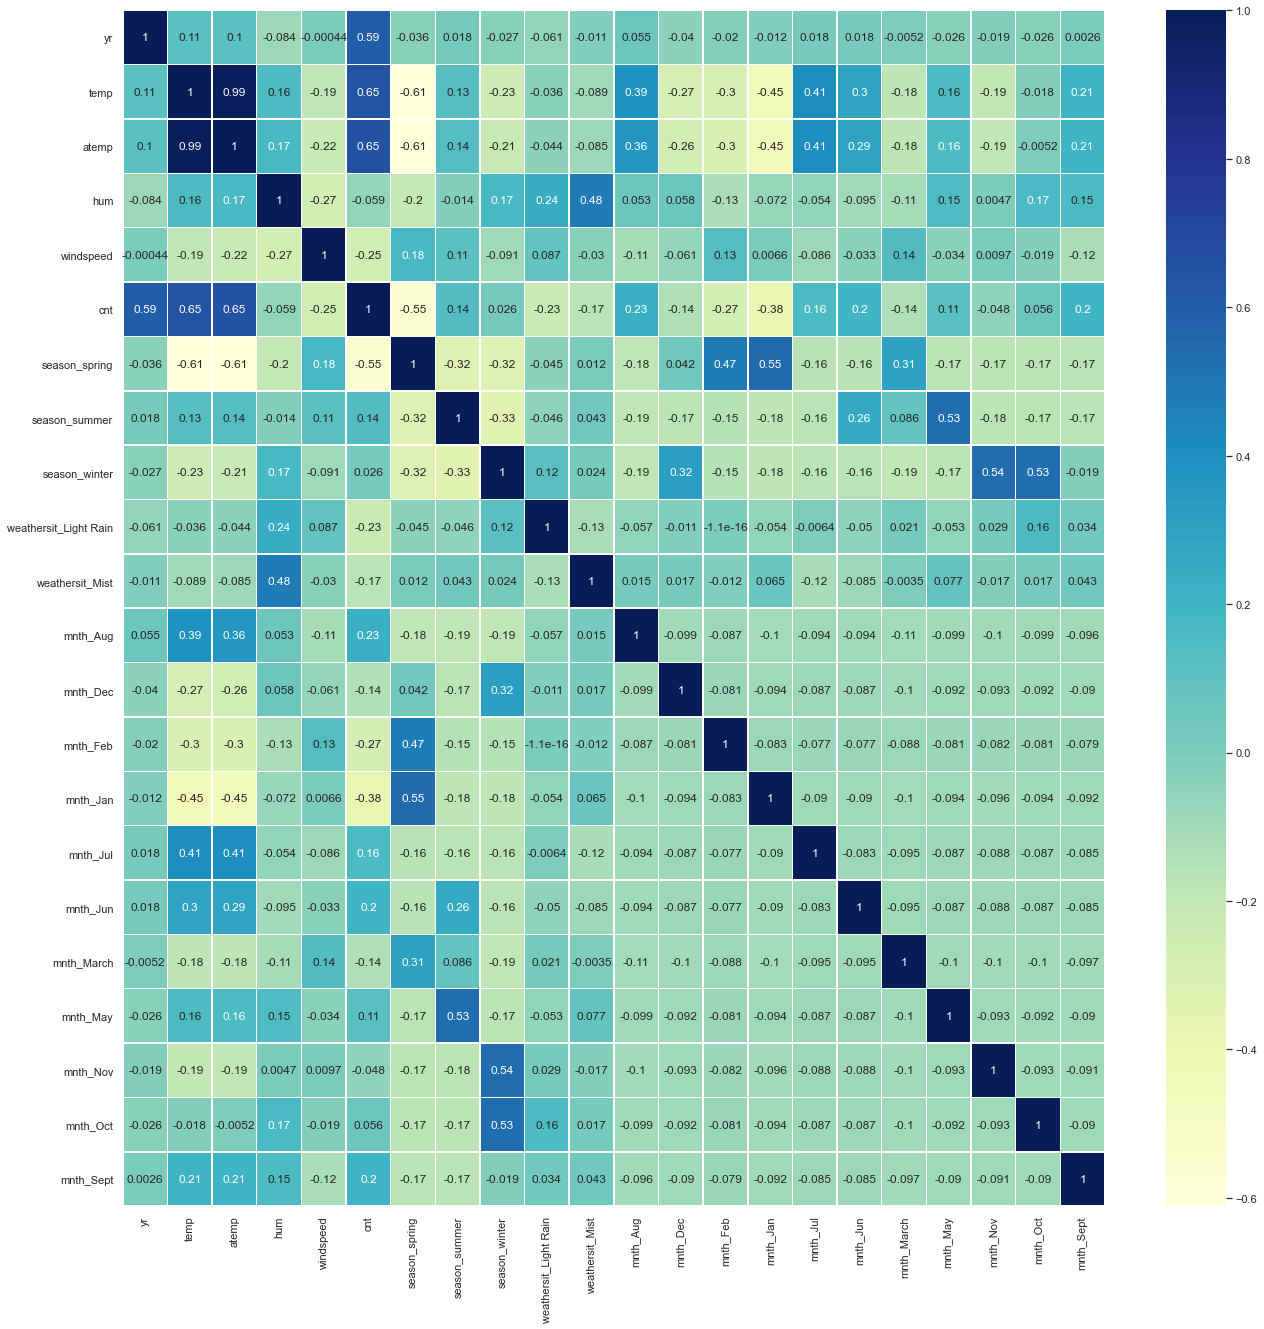

In [ ]:
### Plotting a Correlation Heatmap
plt.figure(figsize=(22,22))
sns.heatmap(bike_train.corr(),annot=True,linewidths=.5, cmap="YlGnBu")

As we can see from the heatmap the co-realtion between Certain seasons ans months is high this bound to happen

But we can also notice that Temp and Atemp are practically the same values and so dropping any one of them would not impact the model.

So for Training we need a Xtrain and a Ytrain, so we will create them now

In [ ]:
y_train_bike = bike_train.pop('cnt')
x_train_bike = bike_train
x_train_bike.head()

,yr,temp,atemp,hum,windspeed,season_spring,season_summer,season_winter,weathersit_Light Rain,weathersit_Mist,...,mnth_Dec,mnth_Feb,mnth_Jan,mnth_Jul,mnth_Jun,mnth_March,mnth_May,mnth_Nov,mnth_Oct,mnth_Sept
576,1,0.815169,0.766351,0.725633,0.264686,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
426,1,0.442393,0.438975,0.640189,0.255342,1,0,0,0,1,...,0,0,0,0,0,1,0,0,0,0
728,1,0.245101,0.200348,0.498067,0.663106,1,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
482,1,0.395666,0.391735,0.504508,0.188475,0,1,0,0,1,...,0,0,0,0,0,0,0,0,0,0
111,0,0.345824,0.318819,0.751824,0.380981,0,1,0,0,1,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
y_train_bike.head()

576    0.827658
426    0.465255
728    0.204096
482    0.482973
111    0.191095
Name: cnt, dtype: float64

In [ ]:
x_train_bike.shape

(510, 21)

In [ ]:
y_train_bike.head()

576    0.827658
426    0.465255
728    0.204096
482    0.482973
111    0.191095
Name: cnt, dtype: float64

In [ ]:
y_train_bike.shape

(510,)

Building the model on all the variables and using RFE from sklearn

In [ ]:
lm = LinearRegression()
lm.fit(x_train_bike,y_train_bike)
rfe = RFE(lm,8)
rfe = rfe.fit(x_train_bike,y_train_bike)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:68: FutureWarning: Pass n_features_to_select=8 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  warnings.warn("Pass {} as keyword args. From version 0.25 "


In [ ]:
list(zip(x_train_bike.columns,rfe.support_,rfe.ranking_))


[('yr', True, 1),
 ('temp', True, 1),
 ('atemp', False, 9),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('season_spring', True, 1),
 ('season_summer', False, 8),
 ('season_winter', False, 3),
 ('weathersit_Light Rain', True, 1),
 ('weathersit_Mist', True, 1),
 ('mnth_Aug', False, 11),
 ('mnth_Dec', False, 6),
 ('mnth_Feb', False, 7),
 ('mnth_Jan', False, 4),
 ('mnth_Jul', True, 1),
 ('mnth_Jun', False, 12),
 ('mnth_March', False, 13),
 ('mnth_May', False, 10),
 ('mnth_Nov', False, 5),
 ('mnth_Oct', False, 14),
 ('mnth_Sept', False, 2)]

In [ ]:
col = x_train_bike.columns[rfe.support_]
col

Index(['yr', 'temp', 'hum', 'windspeed', 'season_spring',
       'weathersit_Light Rain', 'weathersit_Mist', 'mnth_Jul'],
      dtype='object')

In [ ]:
x_bike_train_rfe = x_train_bike[col]

In [ ]:
x_bike_train_rfe.shape

(510, 8)

In [ ]:
x_bike_train_rfe = sm.add_constant(x_bike_train_rfe)

In [ ]:
lm = sm.OLS(y_train_bike,x_bike_train_rfe).fit()
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.824
Model:                            OLS   Adj. R-squared:                  0.821
Method:                 Least Squares   F-statistic:                     292.3
Date:                Fri, 02 Apr 2021   Prob (F-statistic):          2.76e-183
Time:                        18:59:53   Log-Likelihood:                 481.29
No. Observations:                 510   AIC:                            -944.6
Df Residuals:                     501   BIC:                            -906.5
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.3761      0.030     12.334      0.000       0.316       0.436
yr                        0.2321      0.009     27.191      0.000       0.215       0.249
temp                      0.4271      0.026     16.188      0.000       0.375       0.479
hum                      -0.1242      0.039     -3.200      0.001      -0.200      -0.048
windspeed                -0.1851      0.027     -6.923      0.000      -0.238      -0.133
season_spring            -0.1487      0.013    -11.822      0.000      -0.173      -0.124
weathersit_Light Rain    -0.2343      0.028     -8.465      0.000      -0.289      -0.180
weathersit_Mist          -0.0577      0.011     -5.277      0.000      -0.079      -0.036
mnth_Jul                 -0.0902      0.018     -5.092      0.000      -0.125      -0.055
==============================================================================
Omnibus:                       52.646   Durbin-Watson:                   1.967
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              125.644
Skew:                          -0.546   Prob(JB):                     5.21e-28
Kurtosis:                       5.173   Cond. No.                         18.2
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Residual Analysis

In [ ]:
y_train_cnt = lm.predict(x_bike_train_rfe)

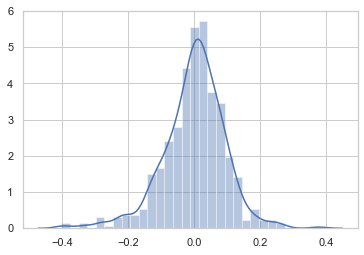

In [ ]:
###Checking for a normal distribution
sns.distplot((y_train_bike - y_train_cnt))

In [ ]:
variable = ['temp','atemp','hum','windspeed','cnt']
bike_test[variable] = scaler.transform(bike_test[variable])

<ipython-input-226-0506e5ef9342>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bike_test[variable] = scaler.transform(bike_test[variable])
C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\indexing.py:966: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


Splitting into X_test and Y_test

In [ ]:
y_test = bike_test.pop('cnt')

In [ ]:
X_test = bike_test

In [ ]:
X_test = bike_test

In [ ]:
x_bike_train_rfe.columns

Index(['const', 'yr', 'temp', 'hum', 'windspeed', 'season_spring',
       'weathersit_Light Rain', 'weathersit_Mist', 'mnth_Jul'],
      dtype='object')

In [ ]:
X_test=sm.add_constant(X_test)

In [ ]:
X_test_new = X_test[x_bike_train_rfe.columns]
X_test_new = sm.add_constant(X_test_new)

In [ ]:
###Predicting on the test data
y_pred = lm.predict(X_test_new)

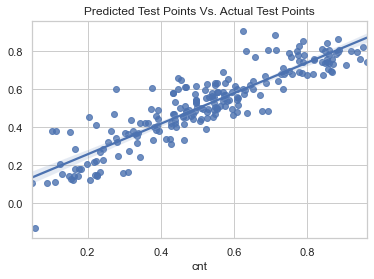

In [ ]:
### Plotting a graph to vizualize the predictions
sns.regplot(x=y_test, y=y_pred)
plt.title('Predicted Test Points Vs. Actual Test Points')
plt.show()

In [ ]:
###Checking the R2 score
r2_score(y_test, y_pred)

0.8055110020503078